

---
ASSIGNMENT 2 : PART 1


---



**Part 1 - Solution #1.1**

 Schema diagram for the data warehouse using a star schema.

 *   The Fact table has three dimension song, user, time and two measure count, fee.
 *   The Dimension table is associated with fact table with the keys from song, user, time.

 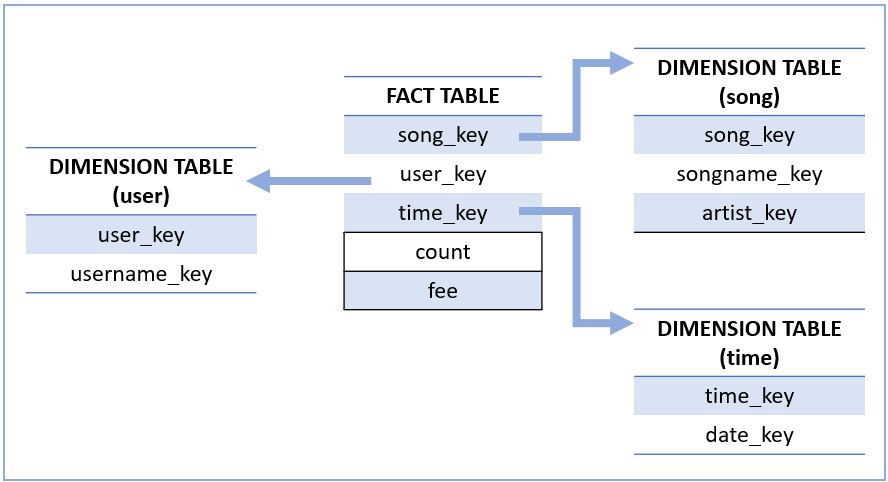
 



---



**Part 1 - Solution #1.2**

Example/Sample Data:

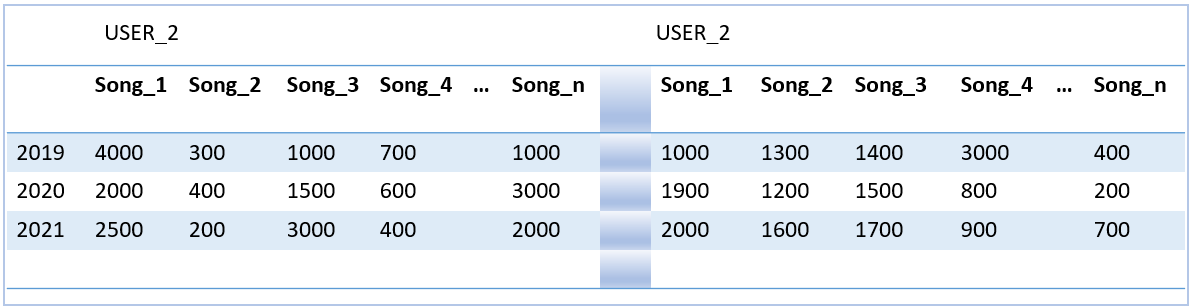



For the set of data in the above figure as an example; Following OLAP operations is to be performed in order to list the total fee collected for a given song for a given month of a given year (e.g. October 2021).



* Slice based on song. e.g. song_2

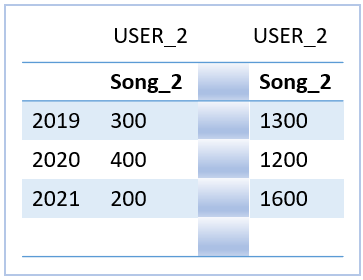
* Slice based on year. e.g. 2021

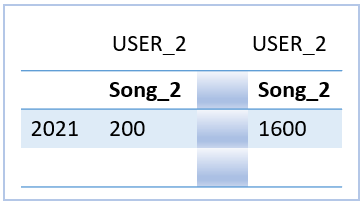

* Drill Down for the individual month for 2021.

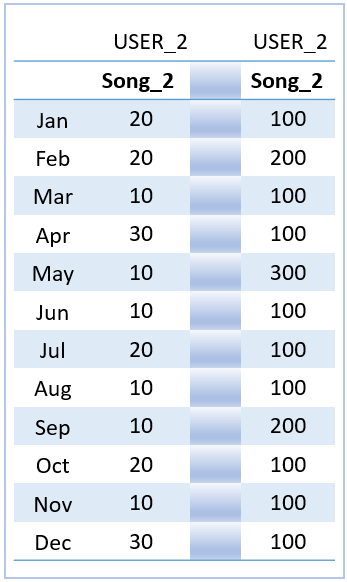

* Slice for the October month.

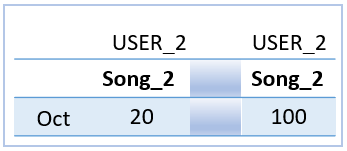



---






**Part 1 - Solution #1.3**

The time dimension -- 4 levels: day, month, quarter, year <br>
The song dimension -- 1 level <br>
The user dimension -- 1 level <br>

To calculate the no. of cuboids will this cube contain, the following formula would be used:<br>

$ \text{Total Number of Cuboid} = ℿ_{n=1}^{3} (L_i + 1) $<br>

where, <br>
i: total number of dimension, in the case above it's 3<br>
L: total number of level for the dimension without the 'virtual all'<br>

$ \text{Total Number of Cuboid} = (4 + 1) * (1 + 1) *(1 + 1) = 5*2*2 = 20 $<br>

**Answer:** for the above case **20** cuboid would be presesnt for the cube.


---



**Part 1 - Solution #2.**

A car rental company has a data warehouse that holds record ID lists of vehicles in terms of brands (Audi, Ford, Mini) and store branches (Tower Hamlets, Newham, Hackney). 

Initials used for vehicle brand: <br>
* Audi - AU 
* Ford - FO 
* Mini - MI

Initial used for store branches: <br>
* Tower Hamlets - TH
* Newham - NH
* Hackney - HA 

The Base table with all the record Combination:

|Records |Brand |Branch |
|-- |--|--|
|R1 |AU |TH |
|R2 |AU |NH |
|R3 |AU |HA |
|R4 |FO |TH |
|R5 |FO |NH |
|R6 |FO |HA |
|R7 |MI |TH |
|R8 |MI |NH |
|R9 |MI |HA |

Corresponding bitmap index table for vehicle brand: \\

|Records |AU |FO |MI|
|-- |--|--| --|
|R1 |1 |0 |0|
|R2 |1 |0 |0|
|R3 |1 |0 |0|
|R4 |0 |1 |0|
|R5 |0 |1 |0|
|R6 |0 |1 |0|
|R7 |0 |0 |1|
|R8 |0 |0 |1|
|R9 |0 |0 |1|



---



**Part 1 - Solution #3.**

The Json file 'tutorial_model.json' is updated to include aggregate measures for the minimum and maximum amount in the data cube.

{
    
    "dimensions": [
        {
         "name":"item",
         "levels": [
                {
                    "name":"category",
                    "label":"Category",
                    "attributes": ["category", "category_label"]
                },
                {
                    "name":"subcategory",
                    "label":"Sub-category",
                    "attributes": ["subcategory", "subcategory_label"]
                },
                {
                    "name":"line_item",
                    "label":"Line Item",
                    "attributes": ["line_item"]
                }
            ]
        },
        {"name":"year", "role": "time"}
    ],
    "cubes": [
        {
            "name": "ibrd_balance",
            "dimensions": ["item", "year"],
            "measures": [{"name":"amount", "label":"Amount"}],
            "aggregates": [
                    {
                        "name": "amount_sum",
                        "function": "sum",
                        "measure": "amount"
                    },
                    {
                        "name": "record_count",
                        "function": "count"
                    },
					{
                        "name": "amount_min",
                        "function": "min",
						"measure": "amount"
                    },
					{
                        "name": "amount_max",
                        "function": "max",
						"measure": "amount"
                    }
                ],               
            "mappings": {
                          "item.line_item": "line_item",
                          "item.subcategory": "subcategory",
                          "item.subcategory_label": "subcategory_label",
                          "item.category": "category",
                          "item.category_label": "category_label"
                         },
            "info": {
                "min_date": "2010-01-01",
                "max_date": "2010-12-31"
            }
        }
    ]
}

The below code shows the execution of code to get the aggregate minimum and maximum of the amount. 

In [2]:
# If you are using Google Colab, you would need to run the below line to install Cubes. 
# You can comment the below line if you are running a local python installation with Cubes installed.
# The below line also installs a particular version of the sqlalchemy package needed to use Cubes.
!pip install cubes
!pip install -Iv sqlalchemy==1.3.9

from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [1]:
engine = create_engine('sqlite:///data.sqlite')
create_table_from_csv(engine,
                      "IBRD_Balance_Sheet__FY2010.csv",
                      table_name="ibrd_balance",
                      fields=[
                          ("category", "string"),
                          ("category_label", "string"),
                          ("subcategory", "string"),
                          ("subcategory_label", "string"),
                          ("line_item", "string"),
                          ("year", "integer"),
                          ("amount", "integer")],
                      create_id=True
                     )

NameError: ignored

In [ ]:
from cubes import Workspace

workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")
workspace.import_model("tutorial_model.json")
cube = workspace.cube("ibrd_balance")
browser = workspace.browser(cube)

In [ ]:
result = browser.aggregate()
print('Minimun and Maximun amount found year wise are:')
result = browser.aggregate(drilldown=["year"])
for record in result:
    print(record)

---

**Part 1 - Solution #4.A**

The below Json file 'model_income.json' is created for Country-Income data: 

{

    "dimensions": [
        {"name":"age", "role": "age"},
        {"name":"region", "role": "region"},
        {"name":"onlineshopper", "role": "onlineshopper"}
    ],
    "cubes": [
        {
            "name": "country_income",
            "dimensions": ["age","region","onlineshopper"],
            "measures": [{"name":"income", "label":"Income"}],
             "aggregates": [
                    {
                        "name": "income_sum",
                        "function": "sum",
                        "measure": "income"
                    },
                    {
                        "name": "income_avg",
                        "function": "avg",
                        "measure": "income"
                    },
					{
                        "name": "income_min",
                        "function": "min",
						"measure": "income"
                    },
					{
                        "name": "income_max",
                        "function": "max",
						"measure": "income"
                    }
					
                ],
            "info": {
                "min_date": "2010-01-01",
                "max_date": "2010-12-31"
            }
        }
    ]
}


The below code shows the data cube initialization code for country-income data:   

In [ ]:
create_table_from_csv(engine,
                      "country-income.csv",
                      table_name="country_income",
                      fields=[
                          ("region", "string"),
                          ("age", "integer"),
                          ("income", "integer"),
                          ("onlineshopper", "string")],
                      create_id=True
                     )

from cubes import Workspace

workspace = Workspace()
workspace.register_default_store("sql", url="sqlite:///data.sqlite")
workspace.import_model("model_income.json")
cube = workspace.cube("country_income")
browser = workspace.browser(cube)
result = browser.aggregate()

---

**Part 1 - Solution #4.B**

The below code shows the aggregate results for: the whole data cube; results per region; results per online shopping activity; and results for all people aged between 40 and 50.

In [ ]:
print('Aggregate results the whole data cube:\n',result.summary)

print('\nAggregate results per region:')
result = browser.aggregate(drilldown=["region"])
print('Summary results:\n',result.summary)
print('Detailed results:')
for record in result:
    print(record)

print('\nAggregate results per online shopping activity:')
result = browser.aggregate(drilldown=["onlineshopper"])
print('Summary results:\n',result.summary)
print('Detailed results:')
for record in result:
    print(record)

print('\nAggregate results for people aged between 40-50:')
import cubes as cubes
cuts = [cubes.RangeCut("age", ["40"],["50"])]
cell = cubes.Cell(cube, cuts)
result = browser.aggregate(cell,drilldown=["age"])
print('Summary results:\n',result.summary)
print('Detailed results:')
for record in result:
  print(record)



---


ASSIGNMENT 2 : PART 2


---
**Part 2 - Solution #1**

Dataset $\mathcal{D}$ contains two observations <br>
 $\mathbf{x}_{1} = (1, -1)$  with class as $y_1 = 0$ <br>
 $\mathbf{x}_2 = (-1, 1)$ with class as $y_2 = 1$ <br>

For the given observation $\mathbf{x} = (-2, 3)$, the distance would be calculated using the Euclidean distance. The formula is:

$ \mathcal{e}(x-x') = ||x-x'|| = \sqrt{\sum_{j=1}^{d}(x_j-x_j')^2}  $ 

So,

$ \mathcal{e}(x-x_1) = ||x-x_1|| = \sqrt{(-2-1)^2+(3-(-1))^2}=\sqrt{(-3)^2+(4)^2}=\sqrt{9+16}=\sqrt{25}=5 $ <br>
$ \mathcal{e}(x-x_2) = ||x-x_2|| = \sqrt{(-2-(-1))^2+(3-1)^2}=\sqrt{(-1)^2+(2)^2}=\sqrt{1+4}=\sqrt{5}=2.2360679775  $ 

**Conclusion**: The $\mathcal{e}(x-x_2)$ = 2.24  is smaller than $\mathcal{e}(x-x_1)$ = 5, which indicates that $x$ is closer to $x_2$ and hence would be classified as $y_2 = 1$.



---



**Part 2 - Solution #2**

Definition: Data are defined by attributes in n-dimensional pattern space. To classify a unknown data through k-nearest-neighbor classifier, it searches for k closesest training or known data to classify the unknown.

For the given scenario in question, lets consider a dataset $\mathcal{D} = {x_1,x_2,x_3 ..... x_n}$ , that contains observations of two different classes, $y=0, y=1$. For a unknown observed data $x$, the distance between $x$ is measured with each k closest individual data from the dataset $x_1,x_2,x_3 ..... x_n$ as $\mathcal{dist}(x-x_1),\mathcal{dist}(x-x_2),\mathcal{dist}(x-x_3), ...\mathcal{dist}(x-x_n) $

* if k = 1, then we can determined the classification based on one nearest neighbour. <br>
* if k = 2, 4 or even, there is a possibility that the feature are equally distributed and data set is equally divided for the clases $y=0, y=1$. In such scenario the classification of the observed data may be difficult and tie breaker would be needed to classify the observation. <br>
* if k = 3, 5 or odd, there is no possibility of equal distribution and the dataset $\mathcal{D}$ would be divided into $(n-1)/2$ for one class and $(n+1)/2$ for other class. As $(n-1)/2 < (n+1)/2$.<br> 

**Conclusion:** For a dataset $\mathcal{D}$ that only contains observations of two different classes. $k$-nearest neighbour classifier does not need a tie-breaking policy when $k$ is odd.


---



**Part 2 - Solution #3**

Let's consider the below scenario for a dataset and it's confusion matrix as an example. For this observation lets assume the classifiers to be $y=0$ and $y=1$ and $y=0$ as the positive scenario.

| ||Actual Positive |Actual Negative|
|--||--|--|
|**Predicted Positive**||True Positive : 10 |False Positive : 0  |
|**Predicted Negative**||False Negative : 90 | True Negative : 10000 |

to calculate the accuracy the formula used is:

$Accuracy = \frac{N_{TP}+N_{TN}}{N_{TP}+N_{FP}+N_{TN}+N_{FN}} = \frac{10+10000}{10+90+10000}
= \frac{10010}{10100} = 99.10 \% $

From the above calculation, it can be inferred that the accuracy of the model to predict the class $y=0$ is 99.10% which is very high. In the above example there are 100 actual positive data and 10000 negative data and as the True Negative is 10000, it can be said that in the whole dataset, majority of the data are from the class $y=1$.

Though the model prediction w.r.t to positive class &y=0& is accurate with 91.0%, it does not not help in identifying the majority classes for the whole dataset.

---


**Part 2 - Solution #4**

Let's consider the below scenario for a dataset with positve case as class $y$. 

| ||Actual Positive |Actual Negative|
|--||--|--|
|**Predicted Positive**||True Positive : 10 |False Positive : 0  |
|**Predicted Negative**||False Negative : 90 | True Negative : N/A |


$Precision = \frac{N_{TP}} {N_{TP} + N_{FP}} = \frac{10}{10+0} = 1 $ <br>

For $Precision$ to be 1, the False Positive has to be zero which indicates that from the test dataset, none of the class $y$ observation were classified incorrect by the model. 

$Recall = \frac{N_{TP}} {N_{TP} + N_{FN}} = \frac{10}{10+90} = 0.1 $ <br>

For $Recall$ to be 0.1, the False Negative has to be 90 which indicates that 90 data were falsely classified by the model as negative. These 90 data that shoudl have been classified as  positive class $y$ were classified as negative Class != $y$.

**Conclusion:** From the above example if the classifier predicts that the observation belongs to class $y$, it can be trusted. But it cannot be trusted if it predicts that an observation does not belong to class $y$ as 90% of the data has been incorrectly classified as negative case. 


---



**Part 2 - Solution #5**

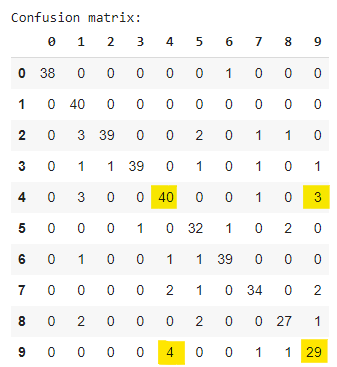

For the above Confusion Matrix: It can be noticed that the character 4 has been incorrectly predicted as the character 9 for four times and the character 9 has been classified has been classified as character 4 three times. This pair of characters have the highest false prediction between each other. 

||4|9|
|--|--|--|
|**4**|40|3|
|**9**|4|29|


**Conclusion:** It can be concluded that the character 4, 9 is the pair of classes that is most confusing for the  1-nearest neighbour classifier.


---



**Part 2 - Solution #6**
The below code trains a support vector machine classifier using the training dataset and computes its accuracy on the corresponding test dataset. 

In [1]:
# Configuring the appearance of ``seaborn`` graphics in this notebook
%config InlineBackend.figure_formats = set(['retina'])

import gzip
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split


# Selecting the training data from the original dataset
f = gzip.open('mnist.pkl.gz', 'rb')
x, y = pickle.load(f, encoding='latin1')[0]
f.close()

# Subsampling
sample_size = 2000

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)

(40000, 784)


In [3]:
from sklearn import svm
from sklearn import metrics

svmc = svm.SVC()
svmc.fit(x_train, y_train)
y_pred = svmc.predict(x_test)

print("Accuracy: {0}.'.metrics.accuracy_score(y_test, y_pred))
print("Accuracy: {0}.'.svmc.score(x_test, y_test))

Accuracy: 0.9756
Accuracy: 0.9756


**Part 2 - Solution #7**


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

parameter = { 
    'n_estimators': [50,100,200],
    'max_features': [0.1,0.25],
}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=parameter, cv=5)
rfc_cv.fit(x_train, y_train)

print('Best hyperparameter setting: {0}.'.format(rfc_cv.best_estimator_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(rfc_cv.best_score_))
print('Test dataset accuracy (random forest classifier): {0}.'.format(rfc_cv.score(x_test, y_test)))

Best hyperparameter setting: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False).
Average accuracy across folds of best hyperparameter setting: 0.9652000000000001.
Test dataset accuracy (random forest classifier): 0.9673.
